In [2]:
import sympy as sym
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

#ÍTEM 1

Punto 1

In [3]:
Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw = sym.symbols("Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw")

In [4]:
P_legs = (1-Loss_dt/100)**(-1)*( g*W*sym.sin(sym.atan(G/100))+g*W*sym.cos(sym.atan(G/100))*C_rr + 0.5*AC_d*rho*(V_gs**2+2*V_gs*V_hw+V_hw**2))*V_gs
P_legs

V_gs*(0.5*AC_d*rho*(V_gs**2 + 2*V_gs*V_hw + V_hw**2) + C_rr*W*g/sqrt(G**2/10000 + 1) + G*W*g/(100*sqrt(G**2/10000 + 1)))/(1 - Loss_dt/100)

In [5]:
poly_form_almost = P_legs.expand(V_gs)
poly_form_almost

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + 0.5*AC_d*V_gs*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1))

In [6]:
poly_form = 0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + (0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1)/100 + sym.sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1) + 100*sym.sqrt(G**2/10000 + 1)))*V_gs
poly_form

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + V_gs*(0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1)))

Punto 2

In [46]:
Pleggs = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],[rho,1.225],[W,83.5],[g,9.77]])
Pleggs

0.21875*V_gs**3 + V_gs*(8.3244387755102*G/sqrt(G**2/10000 + 1) + 4.1622193877551/sqrt(G**2/10000 + 1))

In [39]:
puertos = pd.read_excel("data\puertos.xlsx")
primera_grafica = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==1].reset_index()

In [60]:
x,t =sym.symbols("x,t")
pendiente_1 = primera_grafica["Pendiente promedio [%]"][0]
distancia_1 = primera_grafica["Distancia [km]"][0]
tiempo_1 = primera_grafica["Mejor tiempo registrado en Strava [min]"][0]*60
Pleggs = Pleggs.subs([[G,pendiente_1],[V_gs,x/t]])
Pleggs = Pleggs.subs(x,distancia_1)
Pleggs

126.518695923546/t + 4.16372315625/t**3

<lambdifygenerated-7>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 126.518695923546/t + 4.16372315625/t**3


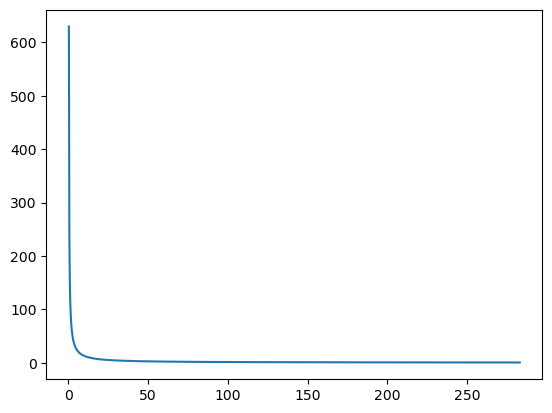

In [67]:
tiempos = np.linspace(0,tiempo_1,1000)
P_leggs = sym.lambdify(t,Pleggs)
plt.plot(tiempos,P_leggs(tiempos))

P_leggs